In [1]:
import os
from sktime.datasets import load_from_ucr_tsv_to_dataframe
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np
import glob
import matplotlib.pyplot as plt
from utils import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
def concatenate_files_from_directory(directory_path='feature_importance/*'):
    import glob
    import pandas as pd
    # Use glob to get all the file paths
    all_files = glob.glob(directory_path)
    
    # Create an empty list to store individual dataframes
    list_of_dfs = []
    
    # Loop through each file and read it into a dataframe
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        list_of_dfs.append(df)
    
    # Concatenate all the dataframes into a single dataframe
    concatenated_df = pd.concat(list_of_dfs, axis=0, ignore_index=True)
    concatenated_df['feature_name'] = concatenated_df['feature_name'].astype(str)
    return concatenated_df

# Example usage
df = concatenate_files_from_directory()

In [3]:
df

feature_name  feature_accuracy  run        transform  \
0                            0          0.574586    0  RandomWalk;0.02   
1                            1          0.497238    0  RandomWalk;0.02   
2                            2          0.497238    0  RandomWalk;0.02   
3                            3          0.375691    0  RandomWalk;0.02   
4                            4          0.508287    0  RandomWalk;0.02   
...                        ...               ...  ...              ...   
522815   lempel_ziv_complexity          0.433333    1  RandomWalk;0.02   
522816         fourier_entropy          0.316667    1  RandomWalk;0.02   
522817     permutation_entropy          0.300000    1  RandomWalk;0.02   
522818  query_similarity_count          0.433333    1  RandomWalk;0.02   
522819     mean_n_absolute_max          0.450000    1  RandomWalk;0.02   

               dataset   method  
0         WordSynonyms  catch22  
1         WordSynonyms  catch22  
2         WordSynonyms  catch22  
3         WordSynonyms  catch22  
4         WordSynonyms  catch22  
...                ...      ...  
522815  SmoothSubspace  tsfresh  
522816  SmoothSubspace  tsfresh  
522817  SmoothSubspace  tsfresh  
522818  SmoothSubspace  tsfresh  
522819  SmoothSubspace  tsfresh  

[522820 rows x 6 columns]

In [4]:
#df = pd.DataFrame(dffi)
#df.sort_values('feature_name')

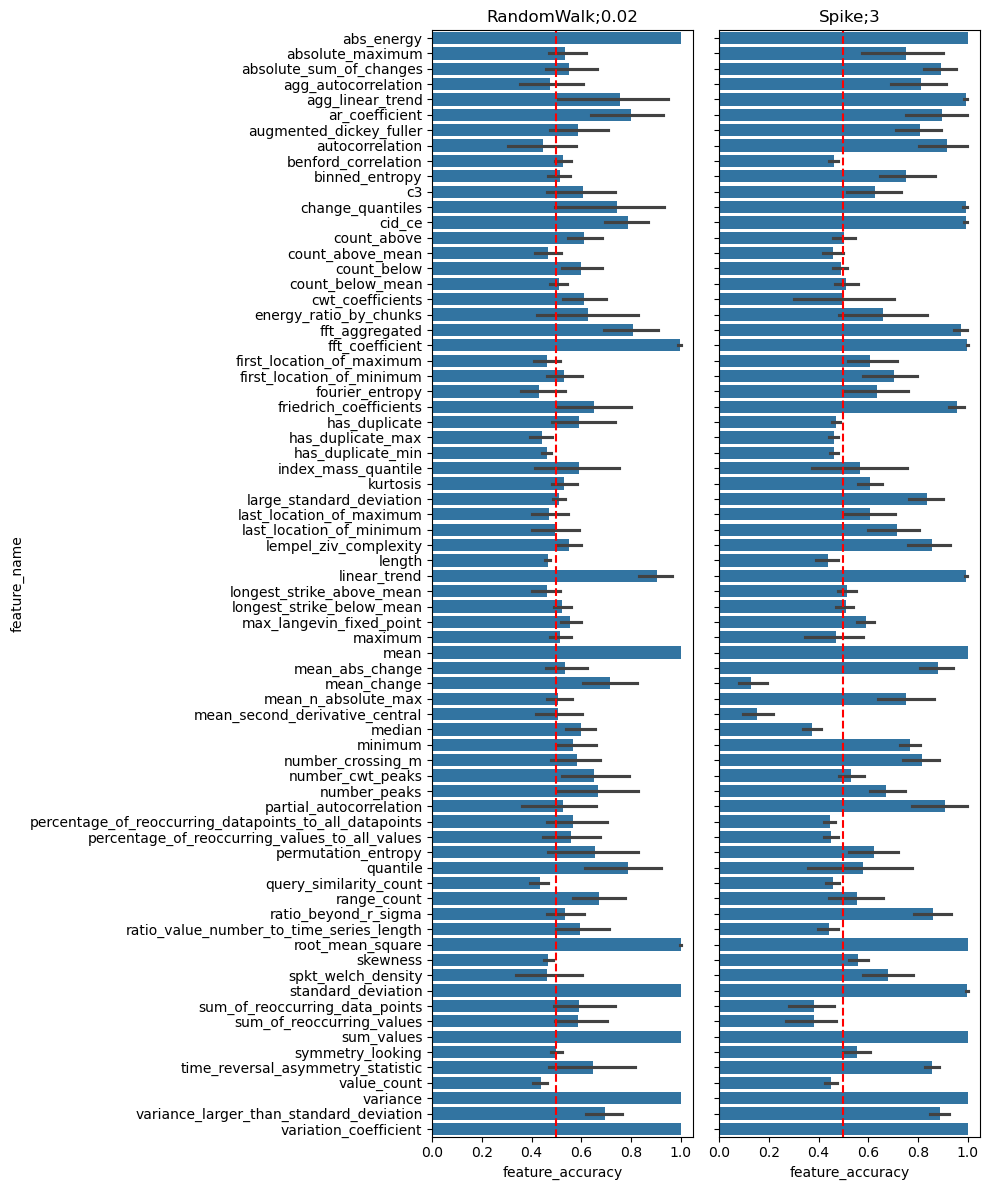

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 12))

sns.barplot(x="feature_accuracy", y="feature_name",
            data=df.query('transform=="RandomWalk;0.02" and method=="tsfresh"').sort_values('feature_name'),
            ax=ax[0])
ax[0].set_title('RandomWalk;0.02')
ax[0].axvline(0.5, color='red', linestyle='--')  # Add the red line
sns.barplot(x="feature_accuracy", y="feature_name",
            data=df.query('transform=="Spike;3" and method=="tsfresh"').sort_values('feature_name'),
            ax=ax[1])
ax[1].set_title('Spike;3')
ax[1].axvline(0.5, color='red', linestyle='--')
ax[1].set(yticklabels=[])
ax[1].set_ylabel('')

plt.tight_layout()
plt.savefig(f'figures/tsfrest_feature_importance.pdf', bbox_inches='tight', pad_inches=0)

In [6]:
#l = [str(x) for x in range(0, 50)]
#sns.barplot(x="feature_accuracy", y="feature_name", data=df.query('transform=="RandomWalk;0.01" and method=="rocket" and feature_name in @l').sort_values('feature_name'))

In [13]:
v = df.query('transform=="RandomWalk;0.02" and method=="rocket"').sort_values('feature_accuracy')
v = v[['feature_name', 'feature_accuracy']].groupby('feature_name').mean().reset_index().sort_values('feature_accuracy')
v

feature_name  feature_accuracy
5461         14912          0.396215
16003         6400          0.401463
12120         2906          0.407033
373          10332          0.409161
11433         2288          0.409203
...            ...               ...
1594         11431          0.619304
17784         8003          0.625644
13190          387          0.630470
14487         5036          0.640383
15129         5614          0.688381

[20000 rows x 2 columns]

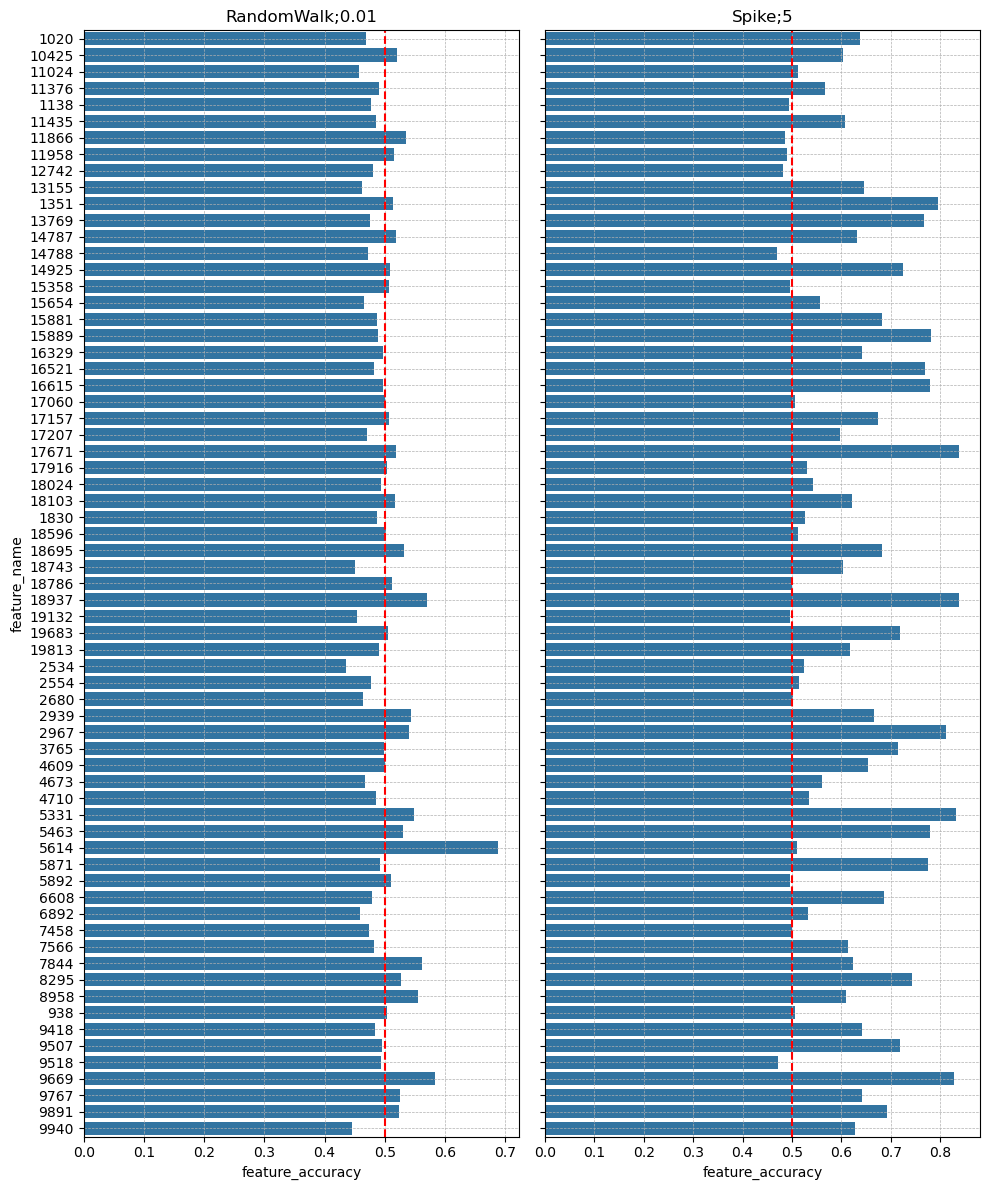

In [14]:
l = [str(x) for x in range(0, 500)]
l = list(v.feature_name)[::-1][::300]

fig, ax = plt.subplots(1, 2, figsize=(10, 12))

sns.barplot(x="feature_accuracy", y="feature_name",
            data=df.query('transform=="RandomWalk;0.02" and method=="rocket" and feature_name in @l').sort_values('feature_name'),
            ax=ax[0], errorbar=None)
ax[0].set_title('RandomWalk;0.01')
ax[0].axvline(0.5, color='red', linestyle='--')  # Add the red line
sns.barplot(x="feature_accuracy", y="feature_name",
            data=df.query('transform=="Spike;3" and method=="rocket" and feature_name in @l').sort_values('feature_name'),
            ax=ax[1], errorbar=None)
ax[1].set_title('Spike;5')
ax[1].axvline(0.5, color='red', linestyle='--')
ax[1].set(yticklabels=[])
ax[1].set_ylabel('')

ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig(f'figures/rocket_feature_importance.pdf', bbox_inches='tight', pad_inches=0)

In [9]:
#list(df.query('transform=="RandomWalk;0.01" and method=="rocket"').feature_name)[:20]

In [10]:
#plt.plot(list(v.feature_accuracy))

In [11]:
#list(v.feature_name)[::300]